Import Des Bibliothèques

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Import du Jeu de données

In [6]:
data=pd.read_csv('Patients.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance


Vérification des valeurs nulles

In [7]:
data.isnull().sum()
# data.info()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
"""Aucune valeur nulle n'est à noter ici"""

"Aucune valeur nulle n'est à noter ici"

In [9]:
data.describe()

,age,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


Encodage des Valeurs Catégoriques (sex, output et exng)

In [10]:
le = preprocessing.LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['output'] = le.fit_transform(data['output'])
data['exng'] = le.fit_transform(data['exng'])
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Visualisation et analyse de données

Quelle chance a un patient de subir une attaque cardiaque?

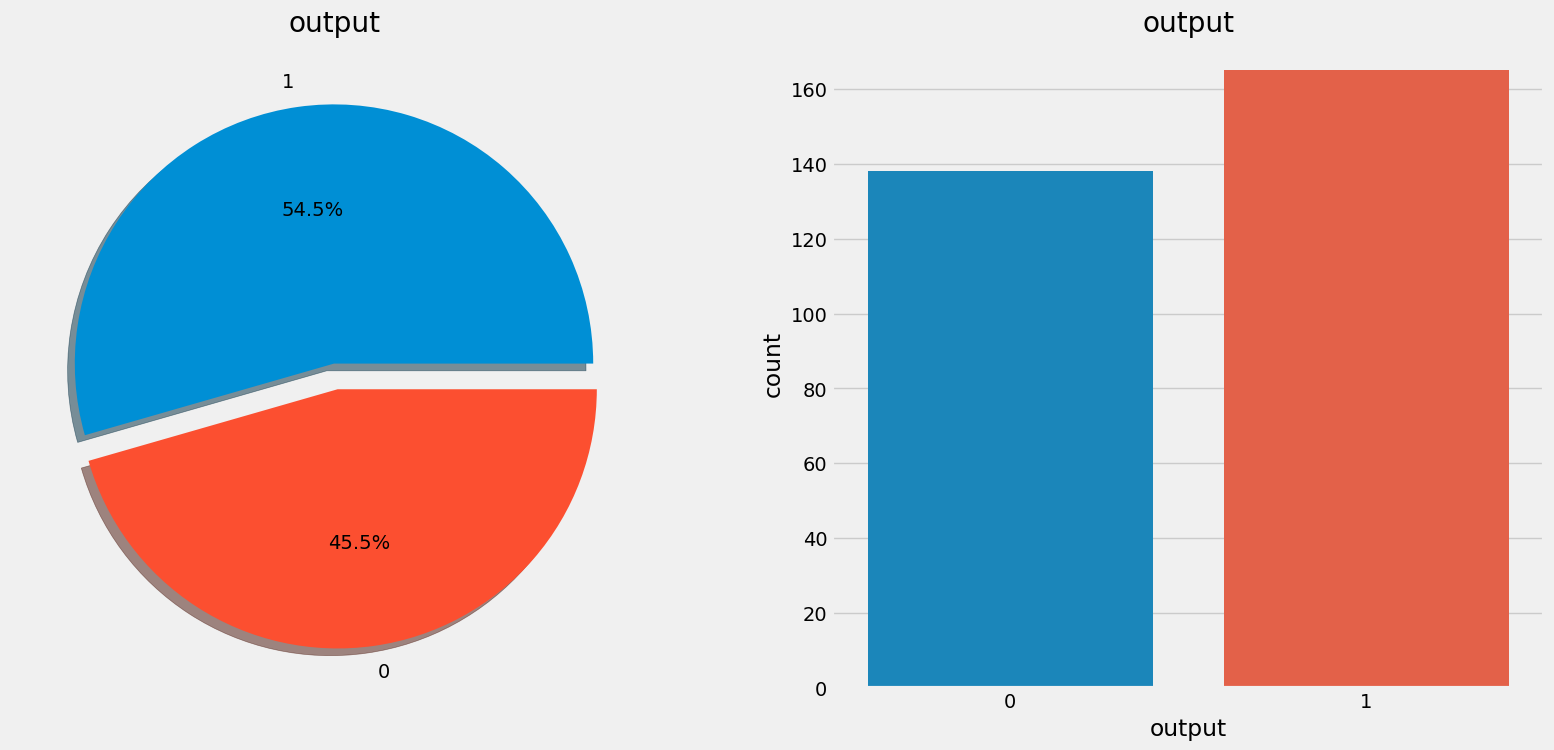

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['output'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('output')
ax[0].set_ylabel('')
sns.countplot(x='output',data=data,ax=ax[1])
ax[1].set_title('output')
plt.show()

In [ ]:
"""Les graphes nous montrent clairement que seul 45.5% de nos 
patients sont pratiquement à l'abri d'une attaque cardiaque"""


Distribution numérique des données

In [12]:
# Liste dss différents types de données du dataframe

list(set(data.dtypes.tolist()))

[dtype('int32'), dtype('int64'), dtype('float64')]

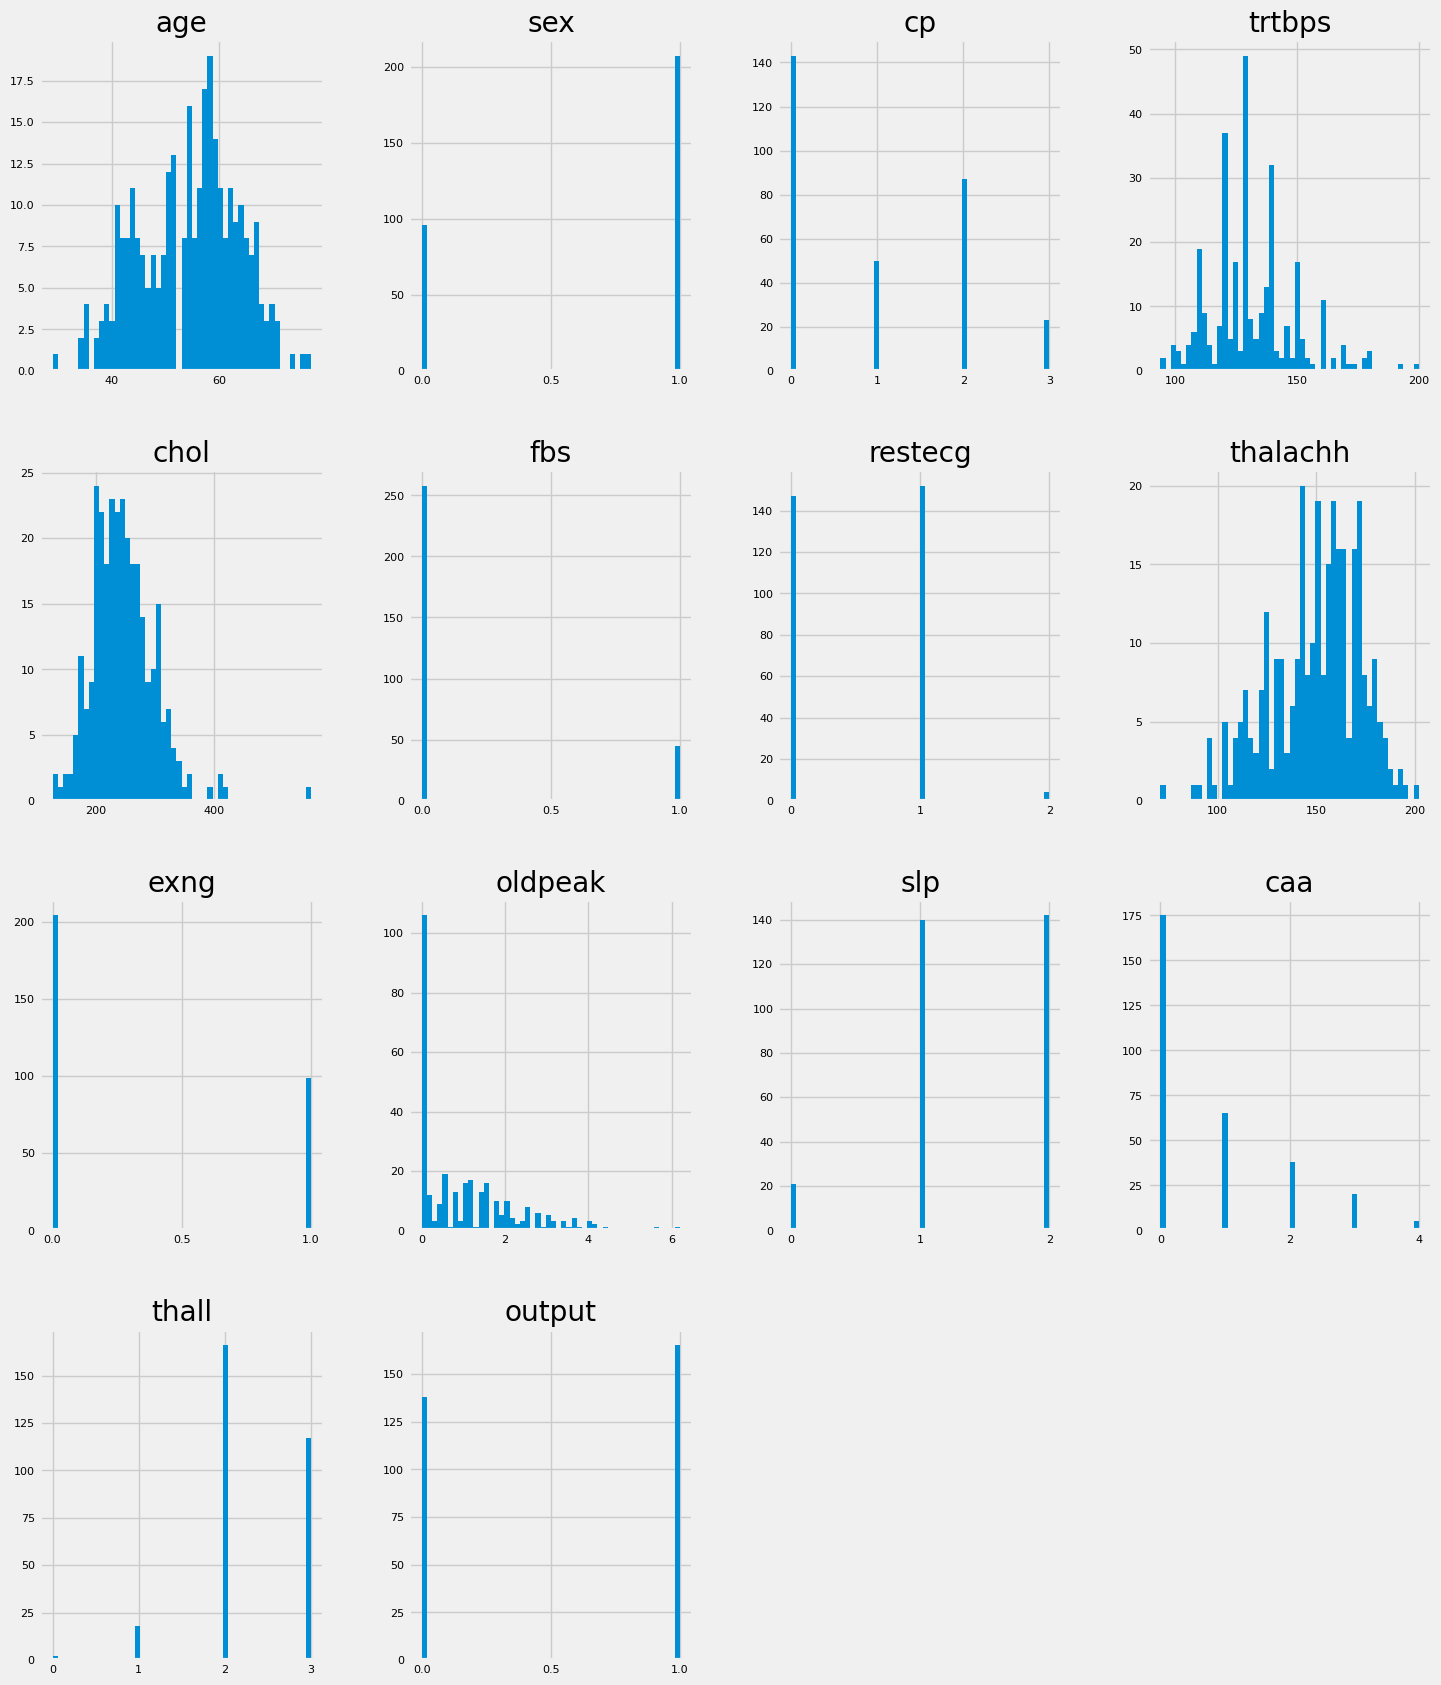

In [13]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Correlation

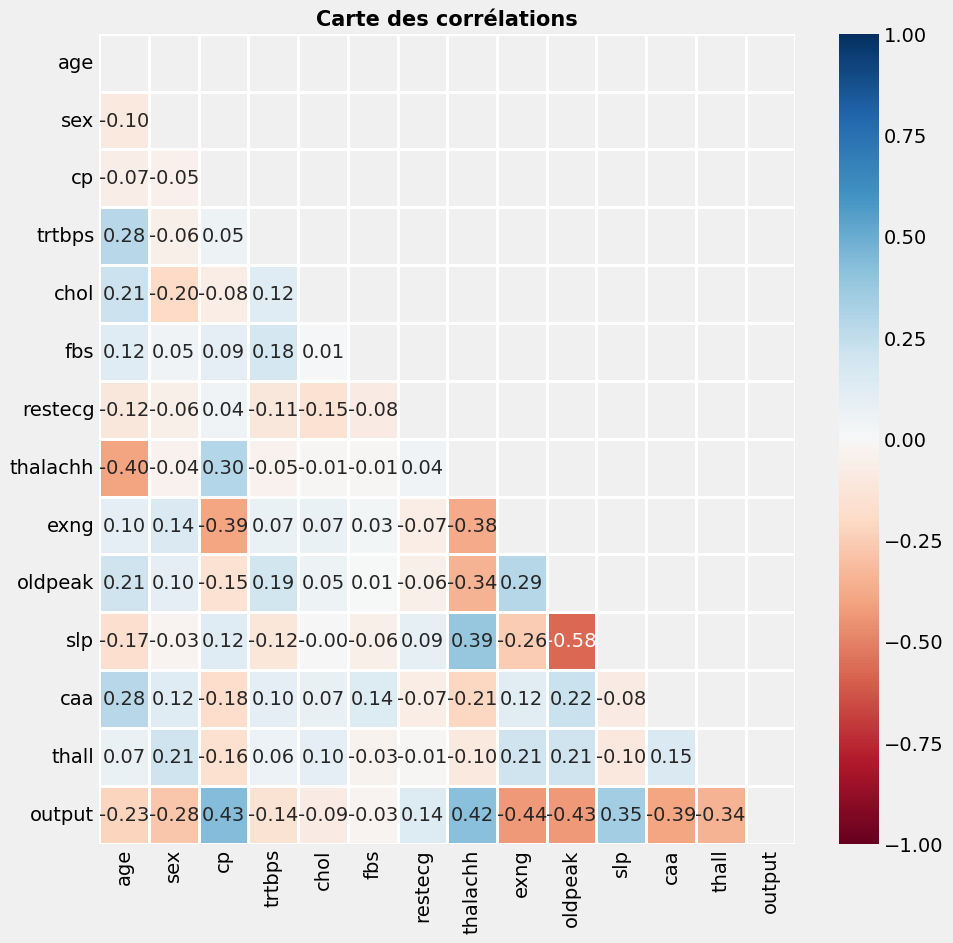

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations', fontsize = 15, fontweight='bold')
plt.show()

In [ ]:
"""
Il n'y a pas de correlation forte entre variable. On observe quelques faibles corrélations
notamment entre oldpeak/slp (négative), thalachh/age (négative), cp/age (positive)
"""

Détecter et Gerer les Outliers

In [15]:
def boxplot(data):
    plt.figure(figsize = (16,6))
    sns.boxplot(data = data)
    plt.grid

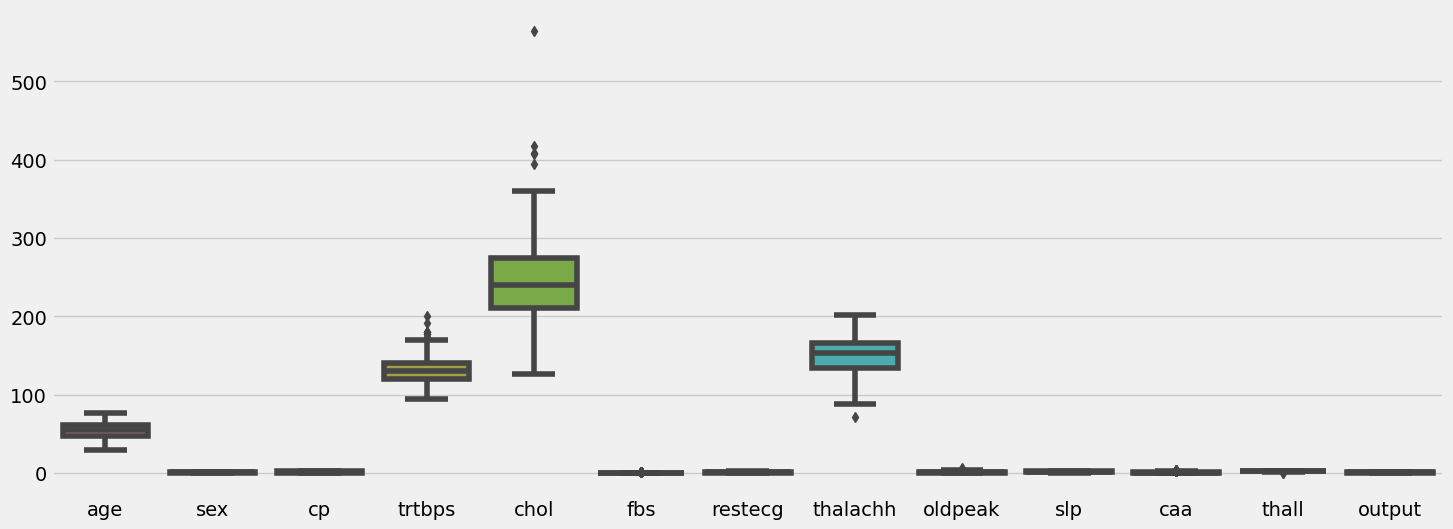

In [48]:
boxplot(data)

In [ ]:
"""
On observe des valeurs aberrantes aux niveaux des colonnes suivantes:
trtbps, chol, fbs, thalachh, caa, thall
"""

In [16]:
# Regroupons ces valeurs 
features = ['trtbps', 'chol', 'fbs', 'thalachh', 'caa', 'thall']

data[features].describe()

,trtbps,chol,fbs,thalachh,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,131.623762,246.264026,0.148515,149.646865,0.729373,2.313531
std,17.538143,51.830751,0.356198,22.905161,1.022606,0.612277
min,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,120.000000,211.000000,0.000000,133.500000,0.000000,2.000000
50%,130.000000,240.000000,0.000000,153.000000,0.000000,2.000000
75%,140.000000,274.500000,0.000000,166.000000,1.000000,3.000000
max,200.000000,564.000000,1.000000,202.000000,4.000000,3.000000


Supprimons toutes les Valeurs abérrantes du dataset

In [17]:
def drop_outliers(df, feature):
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    limit = 1.5*(Q3 - Q1)
    df.drop(df[df[feature] > limit + Q3].index, inplace = True)
    df.drop(df[df[feature] < Q1 - limit].index, inplace = True)

In [19]:
for feature in features:
    drop_outliers(data, feature)

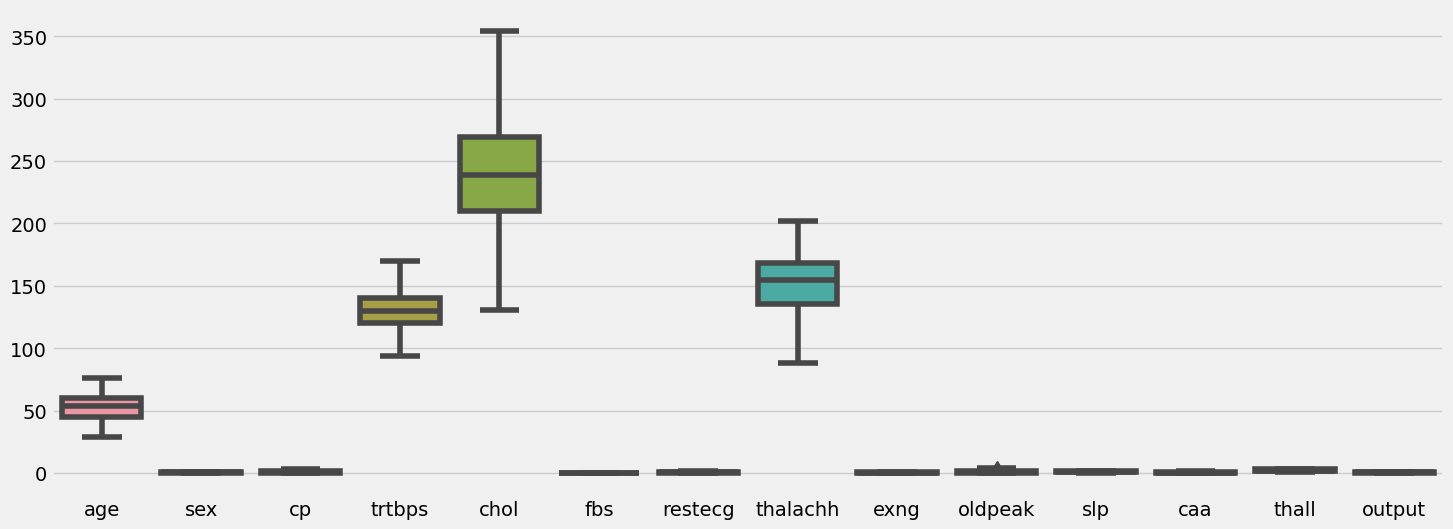

In [20]:
boxplot(data)

In [ ]:
"""Comme on peut le constater, il n'y a plus de valeur abérrante"""

Etudions les différentes corrélations de nouveau

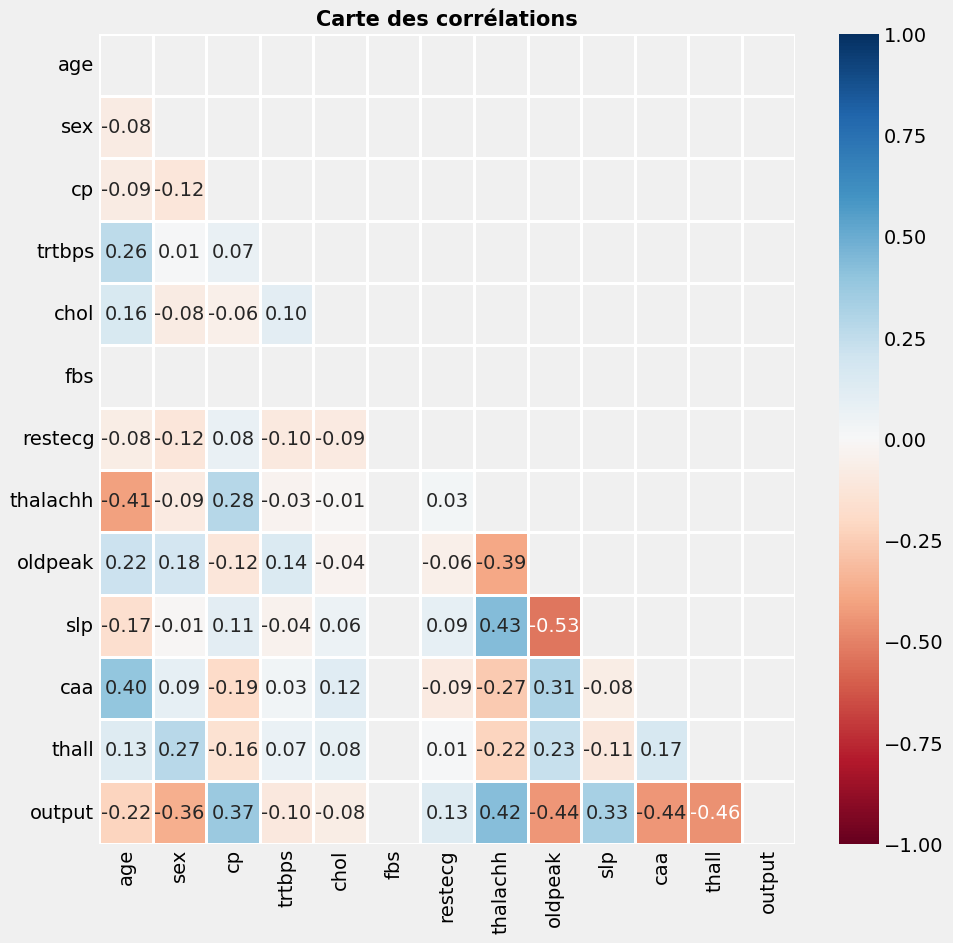

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations', fontsize = 15, fontweight='bold')
plt.show()

In [ ]:
"""La suppression des valeurs aberrantes n'a pas améliorer les corrélations"""

Analyse Basée sur les différentes Features

Sex (Option de catégorisation)

In [12]:
data.groupby(['sex','output'])['output'].count()

sex  output
0    0          24
     1          72
1    0         114
     1          93
Name: output, dtype: int64

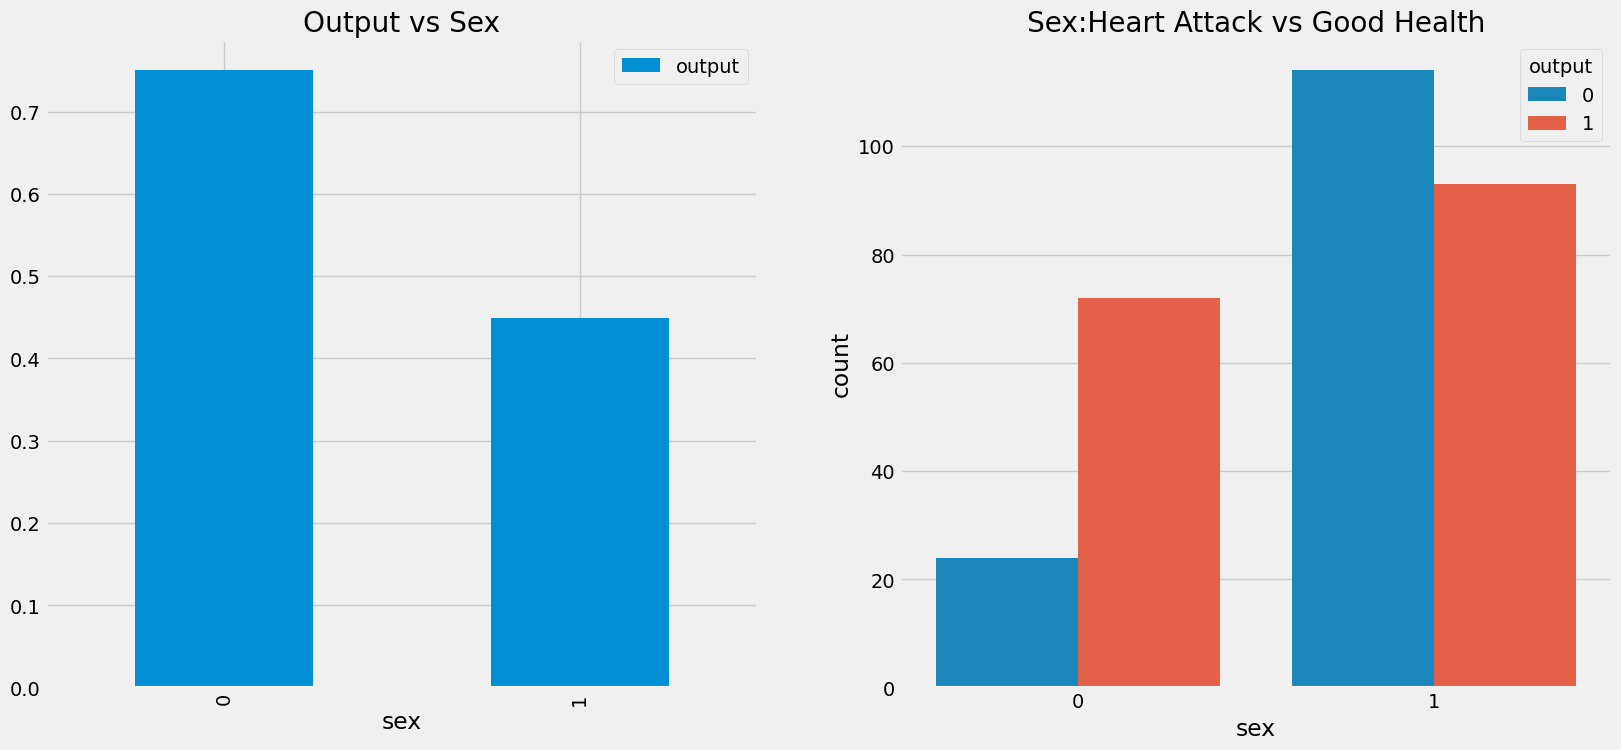

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['sex','output']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Output vs Sex')
sns.countplot(x='sex',hue='output',data=data,ax=ax[1])
ax[1].set_title('Sex:Heart Attack vs Good Health')
plt.show()

In [ ]:
"""
Sex   : 0 = F , 1 = M
Output: 0 = less chance, 1 = more chance

Il y a beaucoup plus de patients homme que de femme. 
45% des patients homme contre 25% des patients femme ont plus chance de subir une attaque cardiaque

"""

Age (Option de Catégorisation)

In [34]:
print(f"L'âge du plus vieux patient: {data['age'].max()}",'Ans')
print(f"L'âge du plus jeune patient: {data['age'].min()}",'Ans')
print(f"L'âges moyen des patients: {data['age'].mean()}",'Ans')

L'âge du plus vieux patient: 77 Ans
L'âge du plus jeune patient: 29 Ans
L'âges moyen des patients: 54.366336633663366 Ans


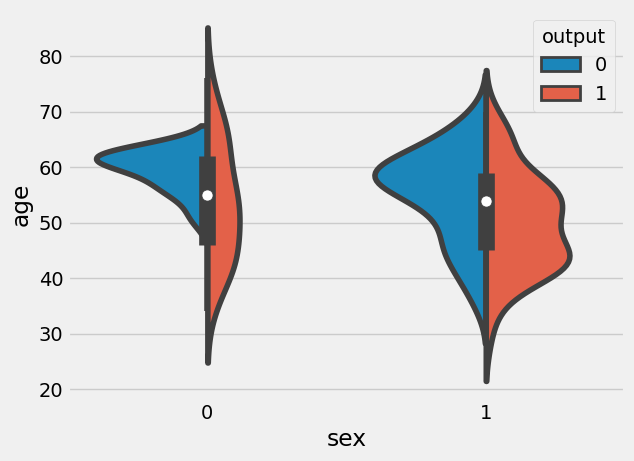

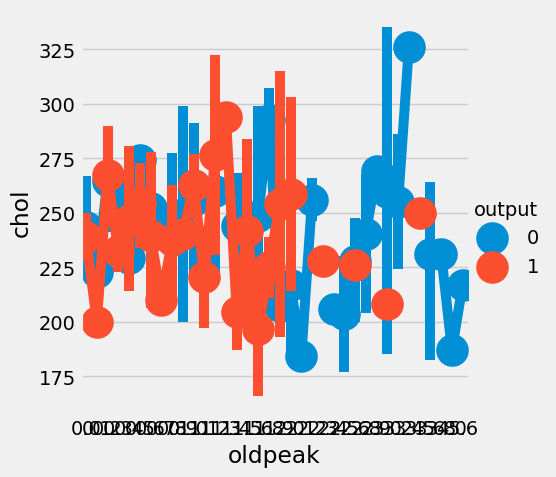

In [36]:
#f,ax=plt.subplots(1,2,figsize=(12,8))
sns.violinplot(x="sex",y="age", hue="output", data=data,split=True)
#ax[0].set_title('Sex and Age vs Output')
#ax[0].set_yticks(range(0,110,10))
#sns.barplot(x="oldpeak",y="chol", hue="output", data=data,split=True,ax=ax[1])
sns.catplot(x='oldpeak', y='chol', kind='point',hue = 'output', data = data)
#ax[1].set_title('Oldpeak and Chol vs Output')
#ax[1].set_yticks(range(0,110,10))
plt.show()

In [ ]:
"""
On peut noter qu'il y a plus de patients hommes que de femmes.
Les patientes dont l'âge est compris entre 50 et 65 ans ont moins de 
chance de subir une attaque cardiaque.Audelà elles sont plus exposées
Les patients de 32 à 72 ans ont moins de chance piquer une crise cardiaque.
Audelà de cette plage d'âges les patients sont exposés à 50%.

SUr le second graphe, on peut que pour les quantités de cholesterol comprise
entre 200 et 275 il y a plus de pique de crise cardiaque.

"""

Fractionnement du jeu de données pour l’entrainement et le test

Traintest - Nettoyage - Encodage

In [37]:
from sklearn.model_selection import train_test_split
df=pd.read_csv('Infos_Malades.csv')

trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [38]:
print(trainset['output'].value_counts())
print("\n")
print(testset['output'].value_counts())

more chance    131
less chance    111
Name: output, dtype: int64


more chance    34
less chance    27
Name: output, dtype: int64


In [39]:
for col in df.select_dtypes('object'):
    print(f"{col:-<50} {df[col].unique()}")

sex----------------------------------------------- ['M' 'F']
exng---------------------------------------------- ['no' 'yes']
output-------------------------------------------- ['more chance' 'less chance']


Encodage

In [40]:
def encodage(df):
    """Fonction d'encodage de valeur"""
    code = {'M':1,
            'F':0,
            'no':0,
            'yes':1,
            'more chance':1,
            'less chance':0}
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
    return df 

Suppression de valeurs nulles

In [41]:
def imputation(df):
    """Suppression de valeur nulle"""
    return df.dropna(axis=0)

Fonction de Preprocessing

In [52]:
def preprocessing(df):
    df = encodage(df)
    df = imputation(df)
    x = df.drop('output', axis=1)
    y = df['output']
    print(y.value_counts())
    return x, y

In [53]:
x_train, y_train = preprocessing(trainset)

1    131
0    111
Name: output, dtype: int64


In [54]:
x_test, y_test = preprocessing(testset)

1    34
0    27
Name: output, dtype: int64


Mise à l’échelle des caractéristiques/features (StandardScaler, MinMaxScaler, RobustScaler)

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

Modele de Regression sans Feature Scaling

In [55]:
# Creating Regression Model
clf = KNeighborsRegressor()
clf.fit(x_train, y_train)

# Accuracy on Tesing Data
clf.predict(x_test)
score=clf.score(x_test,y_test)
print("Accuracy for our testing dataset without Feature scaling is : {:.3f}%".format(score*100) )

Accuracy for our testing dataset without Feature scaling is : 1.124%


StandardScaler

In [59]:
#Creating StandardScaler Object
scaler = preprocessing.StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Seeing the scaled values of X_train
print(x_train[:2])

[[-1.32773282 -1.43641607  0.98584243 -0.57412513 -0.63267424 -0.41803981
   0.90163913  0.65626162 -0.70929937 -0.72460883 -0.66169316 -0.70710678
  -0.46472917]
 [ 1.24903178 -1.43641607  0.98584243  0.83106608  0.58543663 -0.41803981
  -0.97936664  0.09400698 -0.70929937 -0.89249331 -0.66169316  0.26516504
  -0.46472917]]


Appliquons la Regression de nouveau et vérifions le résultat

In [60]:
# Creating Regression Model
model=KNeighborsRegressor()
model.fit(x_train,y_train)

# Accuracy on Tesing Data
y_test_hat=model.predict(x_test)
score=model.score(x_test,y_test)
print("Accuracy for our testing dataset using Standard Scaler is : {:.3f}%".format(score*100) ) 

Accuracy for our testing dataset using Standard Scaler is : 54.549%


In [ ]:
""" 
On note une meilleur amélioration 1,12% à 54,55%
"""

MinMaxScaler

In [62]:
#Creating MinMax Object
mm = preprocessing.MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

#Seeing the scaled values of X_train
x_train[:2]

array([[0.29166667, 0.        , 0.66666667, 0.28571429, 0.18937644,
        0.        , 0.5       , 0.71755725, 0.        , 0.03225806,
        0.5       , 0.        , 0.66666667],
       [0.77083333, 0.        , 0.66666667, 0.53061224, 0.33949192,
        0.        , 0.        , 0.61832061, 0.        , 0.        ,
        0.5       , 0.25      , 0.66666667]])

Vérifions de Nouveau de le résultat en appliquant la Regression

In [63]:
# Creating Regression Model
model=KNeighborsRegressor() 
model.fit(x_train,y_train)

# Accuracy on Tesing Data
y_test_hat=model.predict(x_test) 
score=model.score(x_test,y_test)
print("Accuracy for our testing dataset using MinMax Scaler is : {:.3f}%".format(score*100) )

Accuracy for our testing dataset using MinMax Scaler is : 59.865%


In [ ]:
""" 
On note une net amélioration de 54,55% à 59,86%
"""

RobustScaler

In [64]:
#Creating RobustScaler Object
rob =RobustScaler()

x_train = rob.fit_transform(x_train)
x_test = rob.transform(x_test)

Procedons à une autre vérification en appliquant la Regression

In [65]:
# Creating Regression Model
model=KNeighborsRegressor() 
model.fit(x_train,y_train)

# Accuracy on Tesing Data
y_test_hat=model.predict(x_test) 
score=model.score(x_test,y_test)
print("Accuracy for our testing dataset using MinMax Scaler is : {:.3f}%".format(score*100) )

Accuracy for our testing dataset using MinMax Scaler is : 54.283%


In [ ]:
""" 
On note une légère du score. MinMaxScaler est le modele le mieux adapté dans notre cas.
"""